<a href="https://colab.research.google.com/github/noorwewe/Intelligent-System/blob/fuzzy-expert-system-and-genetic-algorithm/loan_eligibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 16.1 MB/s eta 0:00:00


Loan eligibility score: 85.99999999999999


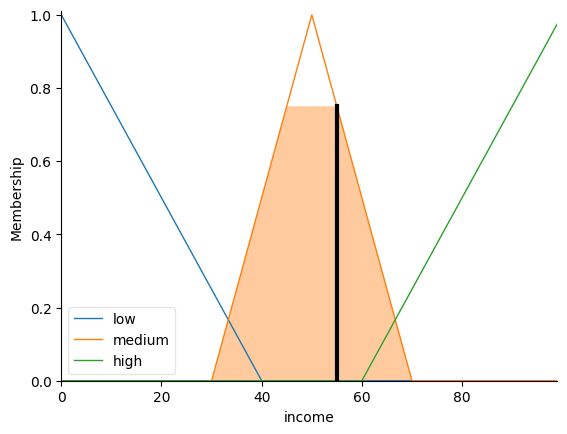

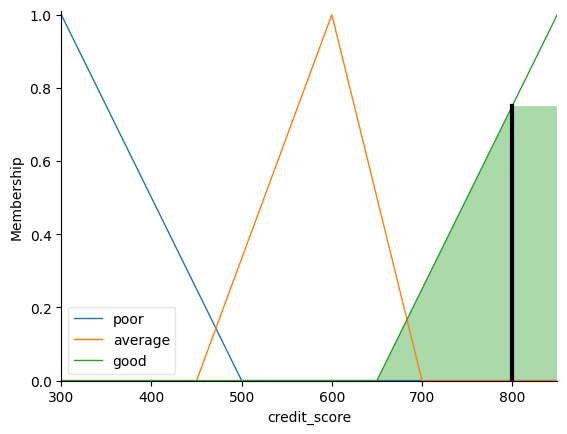

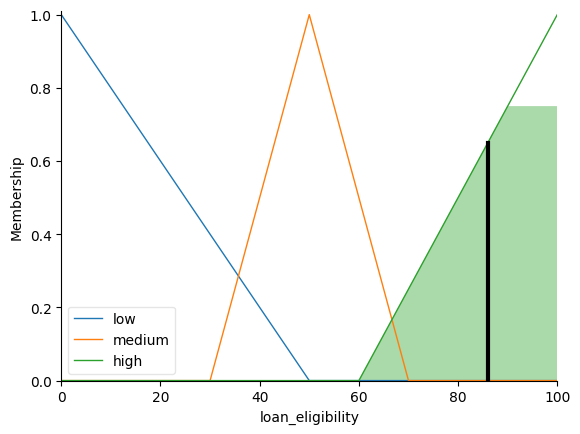

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
income = ctrl.Antecedent(np.arange(0, 100, 1), 'income')
credit_score = ctrl.Antecedent(np.arange(300, 851, 1), 'credit_score')
loan_eligibility = ctrl.Consequent(np.arange(0, 101, 1), 'loan_eligibility')

# Define fuzzy membership functions for income
income['low'] = fuzz.trimf(income.universe, [0, 0, 40])
income['medium'] = fuzz.trimf(income.universe, [30, 50, 70])
income['high'] = fuzz.trimf(income.universe, [60, 100, 100])

# Define fuzzy membership functions for credit score
credit_score['poor'] = fuzz.trimf(credit_score.universe, [300, 300, 500])
credit_score['average'] = fuzz.trimf(credit_score.universe, [450, 600, 700])
credit_score['good'] = fuzz.trimf(credit_score.universe, [650, 850, 850])

# Define fuzzy membership functions for loan eligibility
loan_eligibility['low'] = fuzz.trimf(loan_eligibility.universe, [0, 0, 50])
loan_eligibility['medium'] = fuzz.trimf(loan_eligibility.universe, [30, 50, 70])
loan_eligibility['high'] = fuzz.trimf(loan_eligibility.universe, [60, 100, 100])

# Define the fuzzy rules
rule1 = ctrl.Rule(income['low'] & credit_score['poor'], loan_eligibility['low'])
rule2 = ctrl.Rule(income['low'] & credit_score['average'], loan_eligibility['low'])
rule3 = ctrl.Rule(income['low'] & credit_score['good'], loan_eligibility['medium'])
rule4 = ctrl.Rule(income['medium'] & credit_score['poor'], loan_eligibility['low'])
rule5 = ctrl.Rule(income['medium'] & credit_score['average'], loan_eligibility['medium'])
rule6 = ctrl.Rule(income['medium'] & credit_score['good'], loan_eligibility['high'])
rule7 = ctrl.Rule(income['high'] & credit_score['poor'], loan_eligibility['medium'])
rule8 = ctrl.Rule(income['high'] & credit_score['average'], loan_eligibility['high'])
rule9 = ctrl.Rule(income['high'] & credit_score['good'], loan_eligibility['high'])

# Create a control system and simulation
loan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
loan_simulation = ctrl.ControlSystemSimulation(loan_ctrl)

# Test the system with some input values
loan_simulation.input['income'] = 55  # Medium income
loan_simulation.input['credit_score'] = 800  # Good credit score

# Compute the result
loan_simulation.compute()

# Output the result
print(f"Loan eligibility score: {loan_simulation.output['loan_eligibility']}")

# Visualize input and the result
income.view(sim=loan_simulation)
credit_score.view(sim=loan_simulation)
loan_eligibility.view(sim=loan_simulation)


In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define fuzzy variables
income = ctrl.Antecedent(np.arange(0, 100, 1), 'income')
credit_score = ctrl.Antecedent(np.arange(300, 851, 1), 'credit_score')
loan_eligibility = ctrl.Consequent(np.arange(0, 101, 1), 'loan_eligibility')

# Define fuzzy membership functions for income
income['low'] = fuzz.trimf(income.universe, [0, 0, 40])
income['medium'] = fuzz.trimf(income.universe, [30, 50, 70])
income['high'] = fuzz.trimf(income.universe, [60, 100, 100])

# Define fuzzy membership functions for credit score
credit_score['poor'] = fuzz.trimf(credit_score.universe, [300, 300, 500])
credit_score['average'] = fuzz.trimf(credit_score.universe, [450, 600, 700])
credit_score['good'] = fuzz.trimf(credit_score.universe, [650, 850, 850])

# Define fuzzy membership functions for loan eligibility
loan_eligibility['low'] = fuzz.trimf(loan_eligibility.universe, [0, 0, 50])
loan_eligibility['medium'] = fuzz.trimf(loan_eligibility.universe, [30, 50, 70])
loan_eligibility['high'] = fuzz.trimf(loan_eligibility.universe, [60, 100, 100])

# Define the fuzzy rules
rule1 = ctrl.Rule(income['low'] & credit_score['poor'], loan_eligibility['low'])
rule2 = ctrl.Rule(income['low'] & credit_score['average'], loan_eligibility['low'])
rule3 = ctrl.Rule(income['low'] & credit_score['good'], loan_eligibility['medium'])
rule4 = ctrl.Rule(income['medium'] & credit_score['poor'], loan_eligibility['low'])
rule5 = ctrl.Rule(income['medium'] & credit_score['average'], loan_eligibility['medium'])
rule6 = ctrl.Rule(income['medium'] & credit_score['good'], loan_eligibility['high'])
rule7 = ctrl.Rule(income['high'] & credit_score['poor'], loan_eligibility['medium'])
rule8 = ctrl.Rule(income['high'] & credit_score['average'], loan_eligibility['high'])
rule9 = ctrl.Rule(income['high'] & credit_score['good'], loan_eligibility['high'])

# Create a control system and simulation
loan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
loan_simulation = ctrl.ControlSystemSimulation(loan_ctrl)

# Create a grid of income and credit score values
income_values = np.arange(0, 100, 1)
credit_score_values = np.arange(300, 851, 1)
X, Y = np.meshgrid(income_values, credit_score_values)
Z = np.zeros_like(X)

# Compute the loan eligibility for each combination of income and credit score
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        loan_simulation.input['income'] = X[i, j]
        loan_simulation.input['credit_score'] = Y[i, j]
        loan_simulation.compute()
        Z[i, j] = loan_simulation.output['loan_eligibility']

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels and title
ax.set_xlabel('Income')
ax.set_ylabel('Credit Score')
ax.set_zlabel('Loan Eligibility')
ax.set_title('3D Surface Plot of Loan Eligibility')

plt.show()


KeyboardInterrupt: 